In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import copy
import scipy as sp
Data = pd.read_csv("network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v

def convert_OneDimension(label, data):
    
    if label == labels[1]:
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        for day, number in zip(days, range(len(days))):
            data = data.replace({'Day of Week': {day : number}})
        return data
    
    elif label == labels[3]:
        work_flow_ids = ['work_flow_0', 'work_flow_1','work_flow_2','work_flow_3', 'work_flow_4']
        for work_flow, number in zip(work_flow_ids, range(len(work_flow_ids))):
            data = data.replace({'Work-Flow-ID' : {work_flow : number}})
        return data
    
    elif label == labels[4]:
        uniqueFiles = ['File_{0}'.format(s) for s in range(len((pd.unique(Data['File Name']))))]
        for file_name, number in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name' : {file_name : number}})
        return data      
    else:
        return data

for i in range(len(labels)):
    Data = convert_OneDimension(labels[i], Data)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10)

train_data = Data.iloc[:, 0:5]
target_data = Data[labels[5]]
neighbors_range = range(1,30)

train_rmse_list = []
test_rmse_list = []
for n in neighbors_range:
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(train_data, target_data)
    train_mse_list = []
    test_mse_list = []
    for train_index, test_index in kf.split(train_data):
        train_sample = train_data.iloc[train_index,:]
        train_target = target_data.iloc[train_index]
        train_predicted = neigh.predict(train_sample)
        train_mse = mean_squared_error(train_target, train_predicted)
        train_mse_list.append(train_mse)

        test_sample = train_data.iloc[test_index,:]
        test_target = target_data.iloc[test_index]
        test_predicted = neigh.predict(test_sample)
        test_mse = mean_squared_error(test_target, test_predicted)
        test_mse_list.append(test_mse)

    avg_train_rmse = np.sqrt(np.sum(train_mse) / 10) 
    avg_test_rmse = np.sqrt(np.sum(test_mse) / 10) 
    
    train_rmse_list.append(avg_train_rmse)
    test_rmse_list.append(avg_test_rmse)

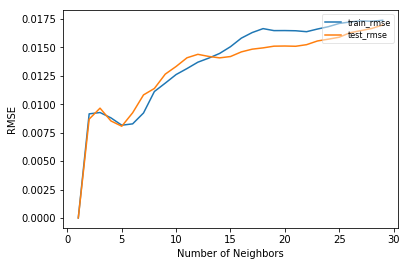

In [33]:
import matplotlib.pyplot as plt

plt.plot(neighbors_range, train_rmse_list, label = "train_rmse")
plt.plot(neighbors_range, test_rmse_list, label = "test_rmse")
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.legend(loc = 1, fancybox = True, framealpha = 0.5, prop = {'size': 8})

plt.show()